In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV  
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, mean_squared_error
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report
from datetime import datetime 
!pip install xgboost
from xgboost import XGBClassifier 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Overview of the datasets

In [4]:
data1 = pd.read_csv("Fraud_Data.csv")

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [ ]:
data1.describe(include='all')

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
count,151112.000000,151112,151112,151112.000000,151112,151112,151112,151112,151112.000000,1.511120e+05,151112.000000
unique,NaN,151112,150679,NaN,137956,3,5,2,NaN,NaN,NaN
top,NaN,2015-04-17 16:05:06,2015-09-10 09:04:53,NaN,ITUMJCKWEYNDD,SEO,Chrome,M,NaN,NaN,NaN
freq,NaN,1,3,NaN,20,60615,61432,88293,NaN,NaN,NaN
mean,200171.040970,NaN,NaN,36.935372,NaN,NaN,NaN,NaN,33.140704,2.152145e+09,0.093646
std,115369.285024,NaN,NaN,18.322762,NaN,NaN,NaN,NaN,8.617733,1.248497e+09,0.291336
min,2.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,18.000000,5.209350e+04,0.000000
25%,100642.500000,NaN,NaN,22.000000,NaN,NaN,NaN,NaN,27.000000,1.085934e+09,0.000000
50%,199958.000000,NaN,NaN,35.000000,NaN,NaN,NaN,NaN,33.000000,2.154770e+09,0.000000
75%,300054.000000,NaN,NaN,49.000000,NaN,NaN,NaN,NaN,39.000000,3.243258e+09,0.000000


In [ ]:
data1.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [5]:
data2 = pd.read_csv("IpAddress_to_Country.csv")

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [ ]:
data2.describe(include='all')

,lower_bound_ip_address,upper_bound_ip_address,country
count,1.388460e+05,1.388460e+05,138846
unique,NaN,NaN,235
top,NaN,NaN,United States
freq,NaN,NaN,46868
mean,2.724532e+09,2.724557e+09,NaN
std,8.975215e+08,8.974979e+08,NaN
min,1.677722e+07,1.677747e+07,NaN
25%,1.919930e+09,1.920008e+09,NaN
50%,3.230887e+09,3.230888e+09,NaN
75%,3.350465e+09,3.350466e+09,NaN


In [ ]:
data2.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [ ]:
data1.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,spent_time
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,52 days 03:51:22
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,0 days 04:59:04
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,0 days 00:00:01
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,5 days 16:41:25
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,50 days 11:31:01


**Let's find the country for each obervation from the IP adresses**





In [ ]:
data1['ip_address'][0]

732758368.79972

In [6]:
ip_cible = data1['ip_address'][0]

In [ ]:
data2.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [ ]:
data2[(data2['lower_bound_ip_address'] <= ip_cible ) & (data2['upper_bound_ip_address'] > ip_cible)]['country'].iloc[0]

'Japan'

In [7]:
def ip_country(ip):
    try:
        country= data2[(data2['lower_bound_ip_address'] <= ip ) & (data2['upper_bound_ip_address'] > ip)]['country'].iloc[0]
    except:
        country='Unknown'
        
    return country


In [ ]:
ip_country(ip_cible)

'Japan'

In [8]:
data1['country'] = data1['ip_address'].apply(lambda x: ip_country(x))

In [ ]:
data1.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,spent_time,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,52 days 03:51:22,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,0 days 04:59:04,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,0 days 00:00:01,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,5 days 16:41:25,Unknown
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,50 days 11:31:01,United States


In [ ]:
# We make a record of this new dataset including the column country
data1.to_csv('Fraud_data_perfect.csv')

In [ ]:
data1.isnull().sum()

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

## Data Visualization


#### Single variable

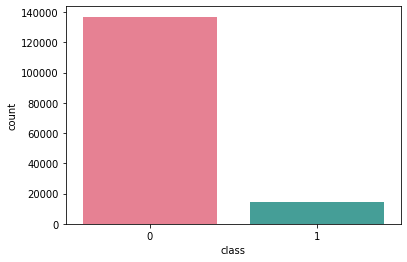

In [10]:
sns.countplot(data1['class'], palette='husl')

The dataset is unbalanced. We have fiew cases of fraud comparing to the non-fraud cases.

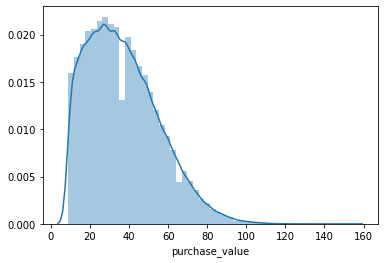

In [13]:
sns.distplot(data1['purchase_value'])

The value of the purchase is between 20 and 60 dollars.

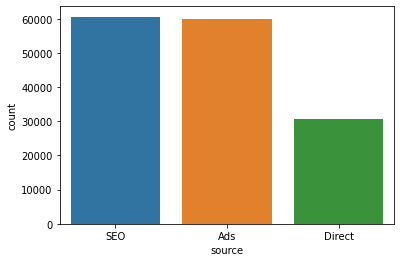

In [14]:
sns.countplot(data1['source'])

Most of the visitors have been on the website thanks to ads or optimization methods to make the website more visible.

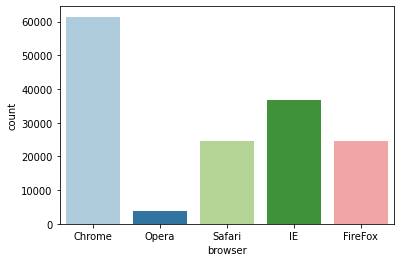

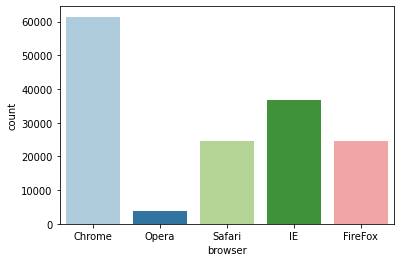

In [16]:
sns.countplot(data1['browser'], palette='Paired')

Chrome is the most used browser

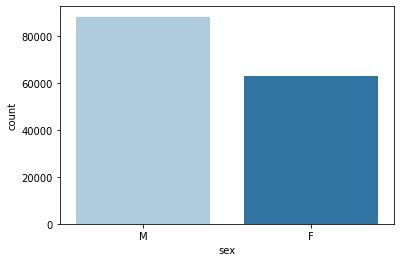

In [19]:
sns.countplot(data1['sex'], palette='Paired')

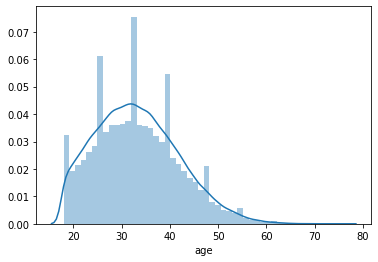

In [18]:
sns.distplot(data1['age'])

Most of the users are between 20 and 40 years old and most of them are men.

**We create a new feature Spent_time that shows how much time the user spent on the website**.

In [20]:
from datetime import datetime 
data1['purchase_time'] = pd.to_datetime(data1['purchase_time'])
data1['signup_time'] = pd.to_datetime(data1['signup_time'])


In [21]:
spent_time = (data1['purchase_time'] - data1['signup_time'])

In [22]:
spent_time.head()

0   52 days 03:51:22
1    0 days 04:59:04
2    0 days 00:00:01
3    5 days 16:41:25
4   50 days 11:31:01
dtype: timedelta64[ns]

In [23]:
data1['spent_time']= data1['purchase_time'] - data1['signup_time']

In [24]:
data1.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,spent_time
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,52 days 03:51:22
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,0 days 04:59:04
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,0 days 00:00:01
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Unknown,5 days 16:41:25
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,50 days 11:31:01


#### Features vs Target

In [25]:
dfclass0 = pd.DataFrame(data1[(data1['class']==0)]['spent_time'])
dfclass1 = pd.DataFrame(data1[(data1['class']==1)]['spent_time'])



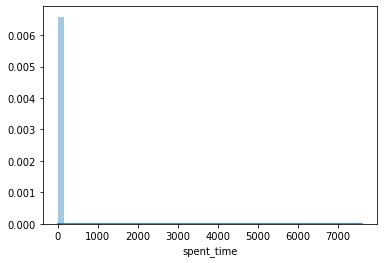

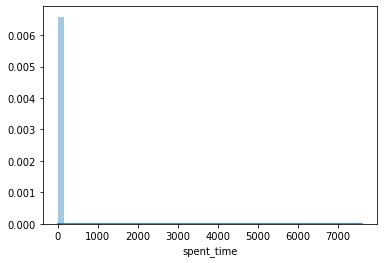

In [27]:
sns.distplot(data1['spent_time'].value_counts())

It seems that fraudulent transactions are made very fast, the time spent on the website lasts few seconds.

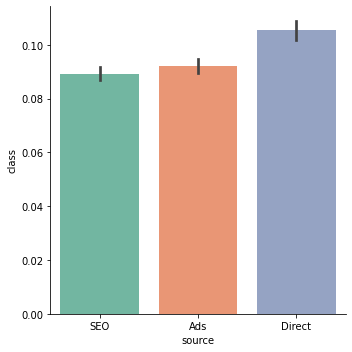

In [28]:
sns.catplot(x='source', y='class', data=data1, kind='bar', palette='Set2')

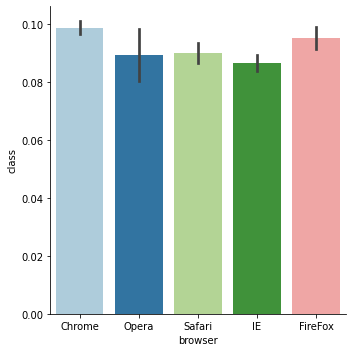

In [29]:
sns.catplot(x='browser', y='class', data=data1, kind='bar', palette='Paired')

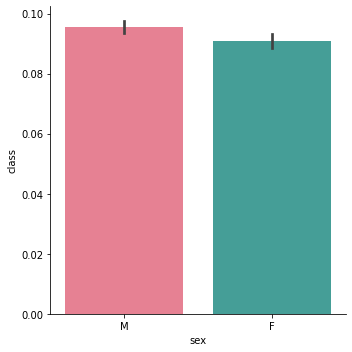

In [30]:
sns.catplot(x='sex', y='class', data=data1, kind='bar', palette='husl')

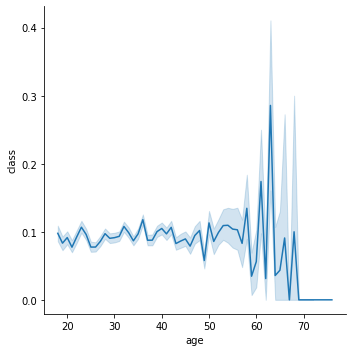

In [31]:
sns.relplot(x='age', y='class', data=data1, kind='line')

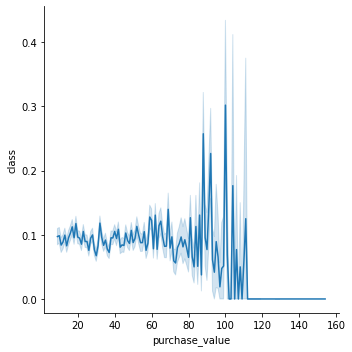

In [32]:
sns.relplot(x='purchase_value', y='class', data=data1, kind='line')

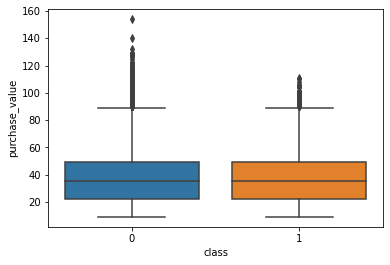

In [33]:
sns.boxplot(x='class', y='purchase_value', data=data1)

In [34]:
data1['purchase_value'].mean()

36.93537243898565

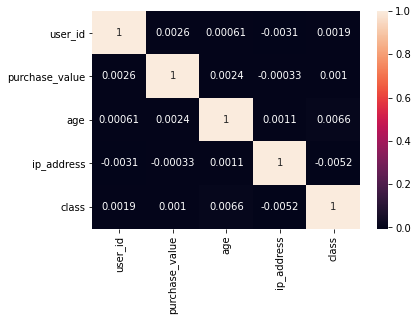

In [35]:
sns.heatmap(data=data1.corr(), annot=True)

**Profile behind the fraudulent transaction:**
We see that users who make frauds are generally going directly on the website (without passing by ads or seo) and make a transaction very fast before leaving the website. The purchase value is around 40 dollars and the user is around 60 years old

## Machine Learning



In [3]:
fraud = pd.read_csv('Fraud_data_perfect.csv', index_col= 0)

We create again the spent time column in the new dataset fraud.

In [4]:
fraud['purchase_time'] = pd.to_datetime(fraud['purchase_time'])
fraud['signup_time'] = pd.to_datetime(fraud['signup_time'])

In [5]:
fraud['spent_time'] = (fraud['purchase_time'] - fraud['signup_time'])

In [ ]:
fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,spent_time,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,52 days 03:51:22.000000000,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,0 days 04:59:04.000000000,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,0 days 00:00:01.000000000,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,5 days 16:41:25.000000000,Unknown
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,50 days 11:31:01.000000000,United States


### Preprocessing

Let's handle the 'country' columns to keep only the main countries where there are frauds.


In [ ]:
fraud['country'].isnull().sum()

0

In [ ]:
fraud[fraud['class']==1]['country'].value_counts()

United States             5551
Unknown                   1883
China                     1043
Japan                      715
United Kingdom             477
                          ... 
Malawi                       1
Angola                       1
Bosnia and Herzegowina       1
Guatemala                    1
Montenegro                   1
Name: country, Length: 110, dtype: int64

In [6]:
fraud['country'] = fraud['country'].apply(lambda x: x if (x == 'United States') | (x =='China') | (x=='Japan') | (x== 'United Kingdom') else "Other")

In [10]:
fraud.iloc[1]

user_id                        333320
signup_time       2015-06-07 20:39:50
purchase_time     2015-06-08 01:38:54
purchase_value                     16
device_id               EOGFQPIZPYXFZ
source                            Ads
browser                        Chrome
sex                                 F
age                                53
ip_address                3.50311e+08
class                               0
spent_time            0 days 04:59:04
country                 United States
Name: 1, dtype: object

Let's handle the spent_time to create a new column that distinguish short periods spent on the website (2 seconds or less) vs longer periods. Short periods mainly mean that it is a fraud.

In [11]:
fraud[fraud['spent_time'] < pd.Timedelta('2 seconds')]['class'].value_counts()

1    7600
Name: class, dtype: int64

In [12]:
fraud['time'] = fraud['spent_time'].apply(lambda x: 'short' if x < pd.Timedelta('2 seconds')
                                          else 'long')

We keep spent time and withdraw the other 'datetype' features.
Also, we withdraw 'device_id and user_id as unique values.


In [13]:
fraud_new = fraud.drop(['signup_time','purchase_time','device_id','user_id','spent_time'], axis=1)

In [14]:
fraud_new.head()

,purchase_value,source,browser,sex,age,ip_address,class,country,time
0,34,SEO,Chrome,M,39,7.327584e+08,0,Japan,long
1,16,Ads,Chrome,F,53,3.503114e+08,0,United States,long
2,15,SEO,Opera,M,53,2.621474e+09,1,United States,short
3,44,SEO,Safari,M,41,3.840542e+09,0,Other,long
4,39,Ads,Safari,M,45,4.155831e+08,0,United States,long


In [15]:
fraud_new['country'].value_counts()

Other             69229
United States     58049
China             12038
Japan              7306
United Kingdom     4490
Name: country, dtype: int64

In [16]:
fraud_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151112 entries, 0 to 151111
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   purchase_value  151112 non-null  int64  
 1   source          151112 non-null  object 
 2   browser         151112 non-null  object 
 3   sex             151112 non-null  object 
 4   age             151112 non-null  int64  
 5   ip_address      151112 non-null  float64
 6   class           151112 non-null  int64  
 7   country         151112 non-null  object 
 8   time            151112 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 11.5+ MB


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151112 entries, 0 to 151111
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   purchase_value  151112 non-null  int64  
 1   source          151112 non-null  object 
 2   browser         151112 non-null  object 
 3   sex             151112 non-null  object 
 4   age             151112 non-null  int64  
 5   ip_address      151112 non-null  float64
 6   country         151112 non-null  object 
 7   time            151112 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 10.4+ MB


In [17]:
# Declaration of target and features_list

y = fraud_new['class']
X = fraud_new.drop('class', axis=1)

# Division of dataset Train set & Test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Declaration of the categorical and numeric transfomers
categorical_transformer = OneHotEncoder(drop='first')
numeric_transformer = StandardScaler()
numeric_features = [0,4,5]
categorical_features = [1,2,3,6,7]

# Declaration of the feature encoder
feature_encoder = ColumnTransformer(
transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
]
)
# Fit of the encoder on X_train and transform of X_train
# Fit on X
feature_encoder.fit(X_train)
print('Shape before feature encoder:', X_train.shape)
X_train = feature_encoder.transform(X_train)
print('Shape after feature encoder:', X_train.shape)

# Transformation of X_test
X_test = feature_encoder.transform(X_test)

print('success', 'ヽ(ヅ)ノ','!')

Shape before feature encoder: (120889, 8)
Shape after feature encoder: (120889, 15)
success ヽ(ヅ)ノ !


### Logistic Regression


In [18]:
lgr = LogisticRegression()

In [19]:
lgr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
print("Train set score : ", lgr.score(X_train, y_train))
print("Test set score : ", lgr.score(X_test, y_test))

Train set score :  0.9568860690385395
Test set score :  0.9556959931178242


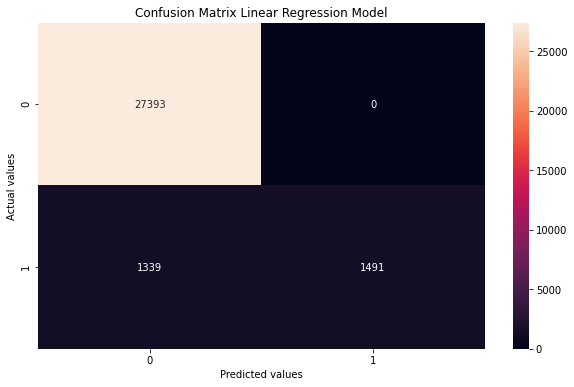

In [23]:
plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test, lgr.predict(X_test))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix Linear Regression Model')
plt.xlabel('Predicted values')
plt.ylabel("Actual values")

plt.show()

In [24]:
print(classification_report(y_true=y_test, y_pred=lgr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     27393
           1       1.00      0.53      0.69      2830

    accuracy                           0.96     30223
   macro avg       0.98      0.76      0.83     30223
weighted avg       0.96      0.96      0.95     30223



### Random Forest

In [25]:
rdf = RandomForestClassifier()

rdf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
print("Train set score : ", rdf.score(X_train, y_train))
print("Test set score : ", rdf.score(X_test, y_test))

Train set score :  0.9999420956414562
Test set score :  0.9548357211395295


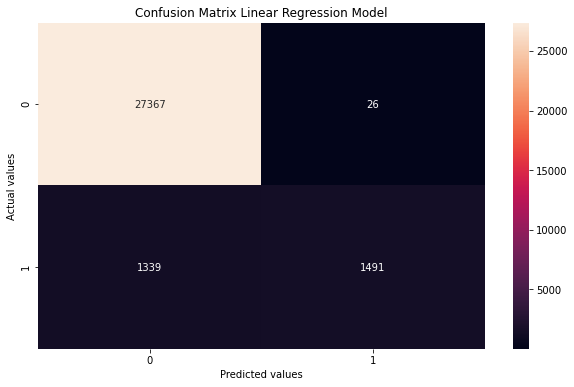

In [27]:
plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test, rdf.predict(X_test))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix Linear Regression Model')
plt.xlabel('Predicted values')
plt.ylabel("Actual values")

plt.show()

In [28]:
print(classification_report(y_true=y_test, y_pred=rdf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     27393
           1       0.98      0.53      0.69      2830

    accuracy                           0.95     30223
   macro avg       0.97      0.76      0.83     30223
weighted avg       0.96      0.95      0.95     30223



### XGBoost

In [29]:
xgb_model = XGBClassifier()


In [30]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [31]:
xgb_model.score(X_test, y_test)

0.9556959931178242

In [32]:
mse=mean_squared_error(y_test, xgb_model.predict(X_test))
print(mse)

0.044304006882175825


In [33]:
print(classification_report(y_true=y_test, y_pred=xgb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     27393
           1       1.00      0.53      0.69      2830

    accuracy                           0.96     30223
   macro avg       0.98      0.76      0.83     30223
weighted avg       0.96      0.96      0.95     30223



### Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
classifier = XGBClassifier()
parameters = {'n_estimators':[50, 100, 150, 200],
              "learning_rate":[1.0, 0.5]}
classifier_best = GridSearchCV(classifier, parameters, verbose=3)
classifier_best.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] learning_rate=1.0, n_estimators=50 ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. learning_rate=1.0, n_estimators=50, score=0.957, total=   2.9s
[CV] learning_rate=1.0, n_estimators=50 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


[CV] .. learning_rate=1.0, n_estimators=50, score=0.956, total=   2.8s
[CV] learning_rate=1.0, n_estimators=50 ..............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.7s remaining:    0.0s


[CV] .. learning_rate=1.0, n_estimators=50, score=0.956, total=   2.8s
[CV] learning_rate=1.0, n_estimators=50 ..............................
[CV] .. learning_rate=1.0, n_estimators=50, score=0.957, total=   2.8s
[CV] learning_rate=1.0, n_estimators=50 ..............................
[CV] .. learning_rate=1.0, n_estimators=50, score=0.956, total=   2.8s
[CV] learning_rate=1.0, n_estimators=100 .............................
[CV] . learning_rate=1.0, n_estimators=100, score=0.957, total=   5.5s
[CV] learning_rate=1.0, n_estimators=100 .............................
[CV] . learning_rate=1.0, n_estimators=100, score=0.956, total=   5.5s
[CV] learning_rate=1.0, n_estimators=100 .............................
[CV] . learning_rate=1.0, n_estimators=100, score=0.956, total=   5.5s
[CV] learning_rate=1.0, n_estimators=100 .............................
[CV] . learning_rate=1.0, n_estimators=100, score=0.957, total=   5.5s
[CV] learning_rate=1.0, n_estimators=100 .............................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  4.6min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [1.0, 0.5],
                         'n_estimators': [50, 100, 150, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_

In [ ]:
classifier_best.score(X_test, y_test)

0.9564239155609966

In [ ]:
print(classification_report(y_true=y_test, y_pred=classifier_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     27373
           1       1.00      0.54      0.70      2850

    accuracy                           0.96     30223
   macro avg       0.98      0.77      0.84     30223
weighted avg       0.96      0.96      0.95     30223



In [ ]:
classifier = RandomForestClassifier(class_weight='balanced')
parameters = {'n_estimators':[50, 100, 150, 200],
              "max_depth":[1, 5, 10],}
classifier_best = GridSearchCV(classifier, parameters, verbose=3)
classifier_best.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=1, n_estimators=50 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........ max_depth=1, n_estimators=50, score=0.957, total=   0.9s
[CV] max_depth=1, n_estimators=50 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ........ max_depth=1, n_estimators=50, score=0.956, total=   0.9s
[CV] max_depth=1, n_estimators=50 ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


[CV] ........ max_depth=1, n_estimators=50, score=0.957, total=   1.0s
[CV] max_depth=1, n_estimators=50 ....................................
[CV] ........ max_depth=1, n_estimators=50, score=0.957, total=   1.0s
[CV] max_depth=1, n_estimators=50 ....................................
[CV] ........ max_depth=1, n_estimators=50, score=0.956, total=   1.0s
[CV] max_depth=1, n_estimators=100 ...................................
[CV] ....... max_depth=1, n_estimators=100, score=0.957, total=   2.0s
[CV] max_depth=1, n_estimators=100 ...................................
[CV] ....... max_depth=1, n_estimators=100, score=0.956, total=   1.9s
[CV] max_depth=1, n_estimators=100 ...................................
[CV] ....... max_depth=1, n_estimators=100, score=0.957, total=   1.8s
[CV] max_depth=1, n_estimators=100 ...................................
[CV] ....... max_depth=1, n_estimators=100, score=0.957, total=   2.0s
[CV] max_depth=1, n_estimators=100 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  5.1min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                          

In [ ]:
classifier_best.score(X_test, y_test)

0.9564239155609966

In [ ]:
print(classification_report(y_true=y_test, y_pred=classifier_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     27373
           1       1.00      0.54      0.70      2850

    accuracy                           0.96     30223
   macro avg       0.98      0.77      0.84     30223
weighted avg       0.96      0.96      0.95     30223



The different models have nearly the same scores. they cannot recognize every fraudulent transactions, but they recognize well when it is not a fraud.
A bit more of 50% of the frauds are recognized. The fact that the dataset is unbalanced can explain why the models don't perform so well. They would need to train on a dataset with more fraudulent transactions examples.
